In [1]:
library(SpatEntropy)
library(ggplot2)
library(stats)
library(factoextra)
library(clusterCrit)
library(scatterplot3d)

Loading required package: spatstat
Loading required package: spatstat.data
Loading required package: nlme
Loading required package: rpart

spatstat 1.58-2       (nickname: ‘Not Even Wrong’) 
For an introduction to spatstat, type ‘beginner’ 

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


In [18]:
file = "../../../../../../dataframes/enh/df_09_transform.csv"

In [19]:
df <- read.csv(file = file)
data <- df
head(data)

aire_acond,ais_otro,ais_pared,ais_techos,ais_ventan,antiguedad,auto_pick,bano_comp,bano_excus,bano_regad,⋯,sanit_agua,tam_loc,tanque_gas,tel_fijo,tenencia,tinaco_azo,tipo_viv,tot_hog,tv_paga,uso_compar
1,0.999163880,0.992196210,0.981884058,0.989966555,0.3535354,1.0000000,0.1111111,0.0000000,0,⋯,1.0000000,0.9590301,1.0000000,0.7009476,0.7268673,0.7979376,0.9966555,1,0.6897993,1.0000000
1,0.008639911,0.008639911,0.008361204,0.008639911,0.1010101,0.4278149,0.2222222,0.0000000,0,⋯,1.0000000,0.9590301,1.0000000,0.7009476,0.7268673,0.7979376,0.3079710,1,0.6897993,1.0000000
1,0.999163880,0.992196210,0.981884058,0.989966555,0.2424242,1.0000000,0.2222222,0.0000000,0,⋯,1.0000000,0.9590301,1.0000000,0.7009476,0.7268673,0.7979376,0.3079710,1,0.6897993,1.0000000
1,0.999163880,0.992196210,0.981884058,0.989966555,0.1010101,0.4278149,0.1111111,0.0000000,0,⋯,1.0000000,0.9590301,0.3004459,0.7009476,0.9941472,0.7979376,0.3079710,1,0.6897993,1.0000000
1,0.999163880,0.992196210,0.981884058,0.989966555,0.3838384,1.0000000,0.1111111,0.0000000,0,⋯,1.0000000,0.9590301,1.0000000,1.0000000,0.7268673,0.7979376,0.9966555,1,1.0000000,1.0000000
1,0.999163880,0.992196210,0.981884058,0.989966555,0.1515152,1.0000000,0.0000000,0.1666667,0,⋯,0.1346154,0.9590301,1.0000000,0.7009476,0.9280936,1.0000000,0.9966555,1,0.6897993,0.0780379


In [20]:
ncol(data)

[1] 61

In [21]:
data_names <- c()
data_entropy <- c()

for (column in 1:ncol(data)) {
#    print(names(data[column]))
    entropy <- SpatEntropy::shannonX(data = matrix(data[column]))
  
  data_names <- append(x = data_names, values = names(data[column]))
  data_entropy <- append(x = data_entropy, values = entropy$shannon)
}

In [22]:
df_entropy <- cbind(data.frame(data_names, data_entropy)) 
head(df_entropy)

data_names,data_entropy
aire_acond,0.03448621
ais_otro,0.05640771
ais_pared,0.09523204
ais_techos,0.13878714
ais_ventan,0.10572149
antiguedad,3.79646658


In [23]:
order_df_entropy <- df_entropy[order(df_entropy$data_entropy, decreasing = T), ]
head(order_df_entropy)

,data_names,data_entropy
6,antiguedad,3.796467
34,focos_ahor,2.816753
43,num_cuarto,1.907477
56,tenencia,1.370501
26,cuart_dorm,1.294048
8,bano_comp,1.074464


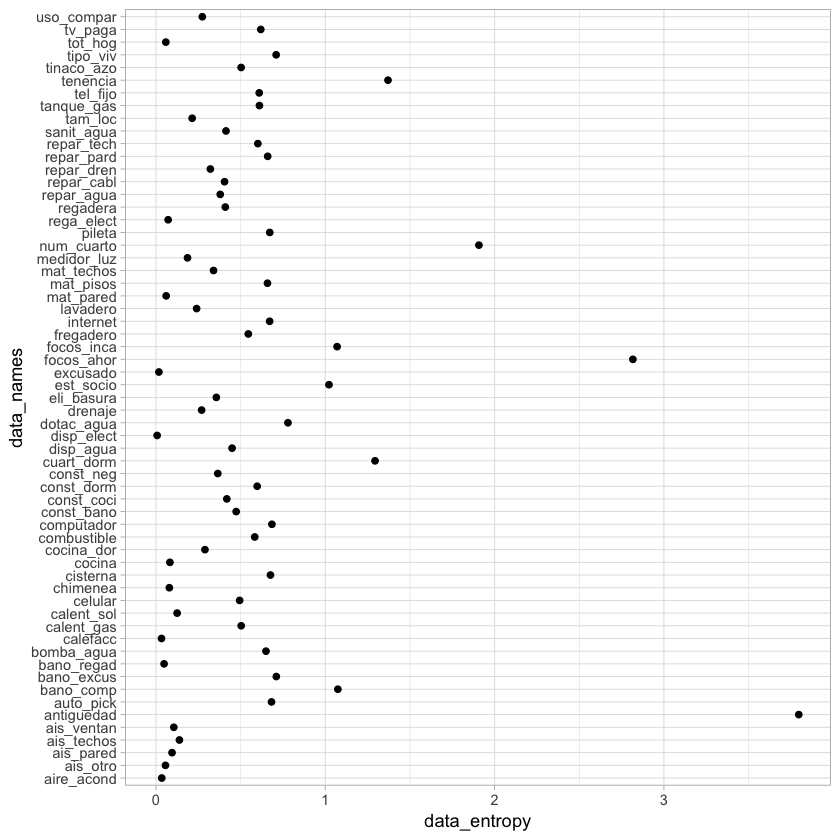

In [24]:
ggplot(df_entropy, 
       aes(y=data_names, x=data_entropy)) + geom_point() + theme_light()

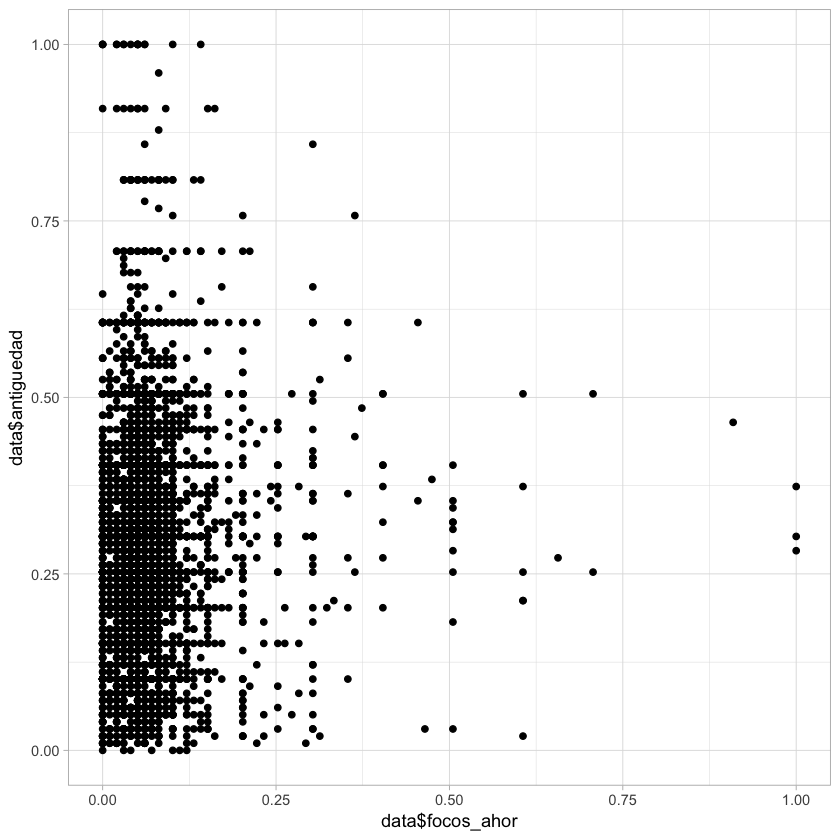

In [25]:
ggplot(data = data, 
       aes(y=data$antiguedad, 
           x=data$focos_ahor)) + geom_point() + theme_light()

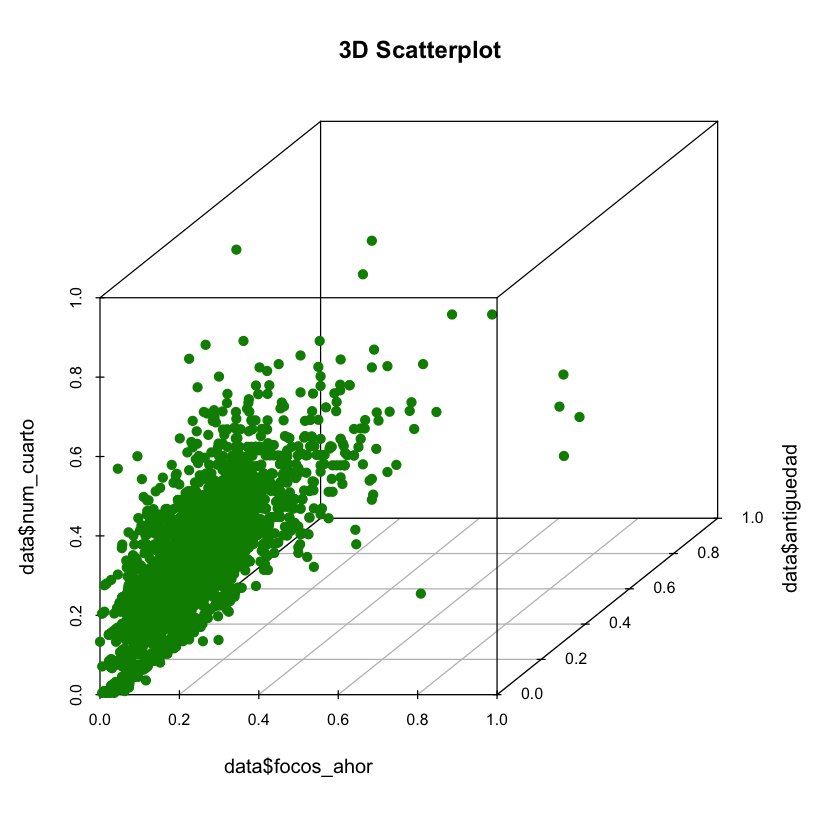

In [26]:
scatterplot3d(y=data$antiguedad, 
              x=data$focos_ahor,
              z=data$num_cuarto, pch = 19, color = "green4", main="3D Scatterplot")





In [12]:
write.csv(order_df_entropy, 
          file = "../../../../../../dataframes/enh/df_09_transform_numerical.csv",
          row.names=FALSE)


In [27]:
data <- as.matrix(data)

In [28]:
range_k = 2:10
dunn_kmeans <- c()
set.seed(123)

for (k in range_k) {
  set.seed(123)
  
  kmeans <- stats::kmeans(x = data, centers = k, nstart = 25)
    print(is.integer(kmeans$cluster))
  
  index_internal_kmeans <- clusterCrit::intCriteria(traj = data,
                                                    part = kmeans$cluster, 
                                                    #part = as.vector(as.integer(kmeans$cluster)), 
                                                    crit = "dunn")
  dunn_kmeans[k-1] <- index_internal_kmeans$dunn
}

[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE
[1] TRUE


In [29]:
dunn_kmeans

[1] 0.17071072 0.13798631 0.18544572 0.07506130 0.12892330 0.09532953 0.09532953
[8] 0.09747719 0.12173114

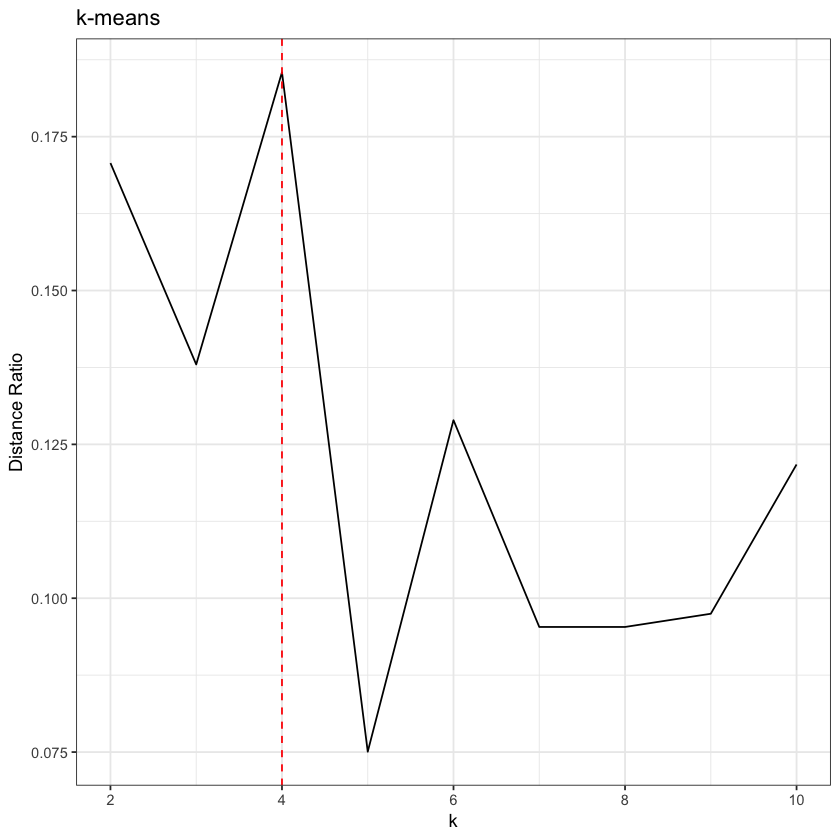

In [30]:
plot_dunn_kmeans <- ggplot2::qplot(x = range_k, 
                                   y = dunn_kmeans, 
                                   geom = 'line', 
                                   main = 'k-means', 
                                   xlab = 'k', 
                                   ylab = 'Distance Ratio')

plot_dunn_kmeans <- plot_dunn_kmeans  + 
  theme_bw() + #ylim(0,0.3) + 
  geom_vline(xintercept = range_k[which.max(dunn_kmeans)],
             linetype = 2, color='red')   
#ggsave(filename = "../../images/enh/dunn_kmeans_2_15.png", dpi = 300)

plot_dunn_kmeans

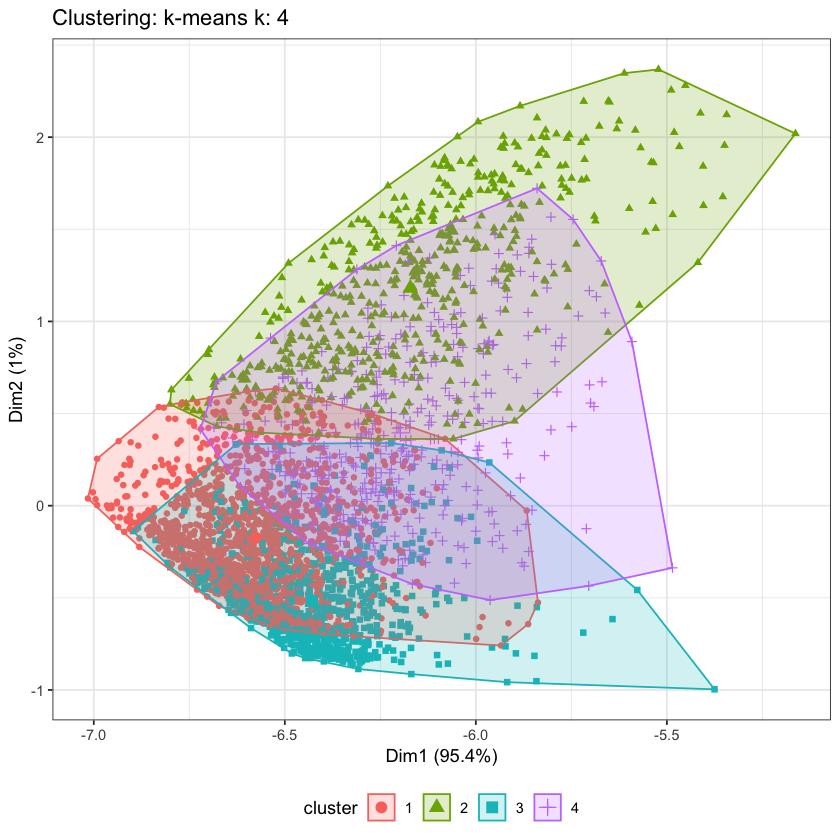

In [31]:
kmeans <- stats::kmeans(x = data, 
                        centers = range_k[which.max(dunn_kmeans)], 
                        nstart = 25)

plot_kmeans <- factoextra::fviz_cluster(object = kmeans,
                                        data = data,
                                        stand = F, 
                                        geom =  'point', 
                                        ellipse.type = 'convex',
                                        ellipse = T,
                                        main = paste('Clustering: k-means k:', range_k[which.max(dunn_kmeans)]),
                                        outlier.color = 'black',
                                        show.clust.cent = T)

plot_kmeans <- plot_kmeans + 
  theme_bw() +
  theme(legend.position = 'bottom')  

plot_kmeans
